## MLB Statistics Data Set
This data set represents statistics of every single MLB team leading back to 1876. It contains 2784 data entries with 41 different attributes containing a mix of categorical and numerical data. The attributes are as follows:

year -
Year of play.

league_id -
League the team plays in with levels AL (American League) and NL (National League).

division_id - 
Division the team plays in with levels W (west), E (east) and C (central).

rank -
Team's rank in their division at the end of the regular season.

games_played -
Games played.

home_games -
Games played at home.

wins -
Number of games won.

losses -
Number of games lost.

division_winner -
Did the team win their division? Levels of Y (yes) and N (no).

wild_card_winner -
Was the team a wild card winner. Levels of Y (yes) and N (no).

league_winner -
Did the team win their league? Levels of Y (yes) and N (no).

world_series_winner -
Did the team win the World Series? Levels of Y (yes) and N (no).

runs_scored -
Number of runs scored during the season.

at_bats -
Number of at bats during the season.

hits -
Number of hits during the season. Includes singles, doubles, triples and homeruns.

doubles -
Number of doubles hit.

triples -
Number of triples hit.

homeruns -
Homeruns by batters.

walks -
Number of walks.

strikeouts_by_batters -
Number of batters struckout.

stolen_bases -
Number of stolen bases.

caught_stealing -
Number of base runners caught stealing.

batters_hit_by_pitch -
Number of batters hit by a pitch.

sacrifice_flies -
Number of sacrifice flies.

opponents_runs_scored -
Number of runs scored by opponents.

earned_runs_allowed -
Number of earned runs allowed.

earned_run_average -
Earned run average.

complete_games -
Number of games where a single pitcher played the entire game.

shutouts -
Number of shutouts.

saves -
Number of saves.

outs_pitches -
Number of outs pitched for the season (number of innings pitched times 3).

hits_allowed -
Number of hits made by opponents.

homeruns_allowed -
Number of homeruns hit by opponents.

walks_allowed -
Number of opponents who were walked.

strikeouts_by_pitchers -
Number of opponents who were struckout.

errors -
Number of errors.

double_plays -
Number of double plays.

fielding_percentage -
Teams fielding percentage.

team_name -
Full name of team.

ball_park -
Home ballpark name.

home_attendance -
Home attendance total.
<br>
<br>
Now obviously I won't be using all these attributes as I will be looking into 1 specific area of this data set. I will be looking into the relationship between homeruns and games won. So likewise the attributes I will be using exclusively from this set are:

year -
Year of play.

team_name -
Full name of team.

games_played -
Games played.

wins -
Number of games won.

losses -
Number of games lost.


runs_scored -
Number of runs scored during the season.

hits -
Number of hits during the season. Includes singles, doubles, triples and homeruns.

homeruns -
Homeruns by batters.

world_series_winner -
Did the team win the World Series? Levels of Y (yes) and N (no).



### Analytics in Baseball
Analytics has become a huge part of baseball over the last few years so much so that it has often times been called a 'Revolution'. People have been able to use a variety of statistical information to be increase winning percentage across the board for their baseball teams. There are countless examples of teams completely changing their front office's and team composition in order to cater to the analytical benefits of baseball. Here in this data set we can see measurements that people at the very highest level of baseball use to ensure their billion dollar franchises are able to maximize winning potential.

## EDA
Now the first thing I noticed when I loaded up this data frame is that this data set contains a massive amount of information. So much so that it makes it hard to even decide what information I want to use. Well for the purpose of this analysis I would like to take a look specifically at the relationship between homeruns and wins. Ultimately to answer my question of, does hitting more homeruns increase your chances of winning games? At first that may seem like common sense, as more runs should equal more wins and thus should correlate to more championship. However there has been substantial studies that show otherwise in the world of baseball. So I decided to investigate myself.

In [1519]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randrange

tempdf = pd.read_csv('https://raw.githubusercontent.com/AvenashRamnarine/CSCI381/main/mlb_teams.csv')
tempdf

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2020,NL,C,3,58,27.0,30,28,N,Y,...,376,69,204,464,33,46,0.983,St. Louis Cardinals,Busch Stadium III,0.0
2780,2020,AL,E,1,60,29.0,40,20,Y,N,...,475,70,168,552,33,52,0.985,Tampa Bay Rays,Tropicana Field,0.0
2781,2020,AL,W,5,60,30.0,22,38,N,N,...,479,81,236,489,40,40,0.981,Texas Rangers,Globe Life Field,0.0
2782,2020,AL,E,3,60,26.0,32,28,N,Y,...,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0


In order to preform my EDA I first had to decide which elements from this data set I would like to use. Obviously to use all the metrics here would just simply be too much. So I decided to choose the attributes that most closely relate to area I am looking into. Those being year, team name, games played, wins, losses, runs scored, hits, homeruns and world series winner.

In [1520]:
df = tempdf[['year','team_name', 'games_played', 'wins', 'losses', 'runs_scored', 'hits', 'homeruns', 'world_series_winner']]
df = df[df.year != 2020]
df

,year,team_name,games_played,wins,losses,runs_scored,hits,homeruns,world_series_winner
0,1876,Boston Red Caps,70,39,31,471,723,9,NaN
1,1876,Chicago White Stockings,66,52,14,624,926,8,NaN
2,1876,Cincinnati Reds,65,9,56,238,555,4,NaN
3,1876,Hartford Dark Blues,69,47,21,429,711,2,NaN
4,1876,Louisville Grays,69,30,36,280,641,6,NaN
...,...,...,...,...,...,...,...,...,...
2749,2019,St. Louis Cardinals,162,91,71,764,1336,210,N
2750,2019,Tampa Bay Rays,162,96,66,769,1427,217,N
2751,2019,Texas Rangers,162,78,84,810,1374,223,N
2752,2019,Toronto Blue Jays,162,67,95,726,1299,247,N


Now that my data frame is established I decided to check for any null values that may be in it.

In [1521]:
df.isnull().sum()

year                     0
team_name                0
games_played             0
wins                     0
losses                   0
runs_scored              0
hits                     0
homeruns                 0
world_series_winner    248
dtype: int64

After running this it does seem like a large amount of null values exist, so I decided to look into it. After looking into the data set I realized that most of these null values are due to missing records in the 'world series winner' column during the late 1800s and early 1900s. Now this is due to the fact that records from that time are old and simply do not exist anymore. Along with this since world_series_winner is a ordinal variable, it doesn't make sense to try and work with these null values. So I ultimately decided to drop these entries as it wouldn't affect the data set much anyway. During the older times of baseball there wasn't much homeruns being hit anyway so keeping these entries wouldn't benefit the purpose of our analysis.

In [1522]:
df.dropna(inplace = True)
df = df.reset_index(drop = True)

Now another thing I decided to do is alter the 'world_series_winner' column. As you can see the column consists of Y's and N's. And while this is a valid representation of the outcome, it can easily be converted to a 1 and 0 representation. And by doing this we would be able to quantify the data later down the line, allowing us to preform calculations on it. So I decided to do just that.

In [1523]:
df.world_series_winner = (df.world_series_winner.map(dict(Y=1, N=0))).astype(int)

Once I finished cleaning up the data I decided to plot the attributes just so I could get a graphical representation of them. Often times by looking at the visualizations you can spot things that may have been hidden otherwise. The plot I used just shows the general amount of entries for each attribute.

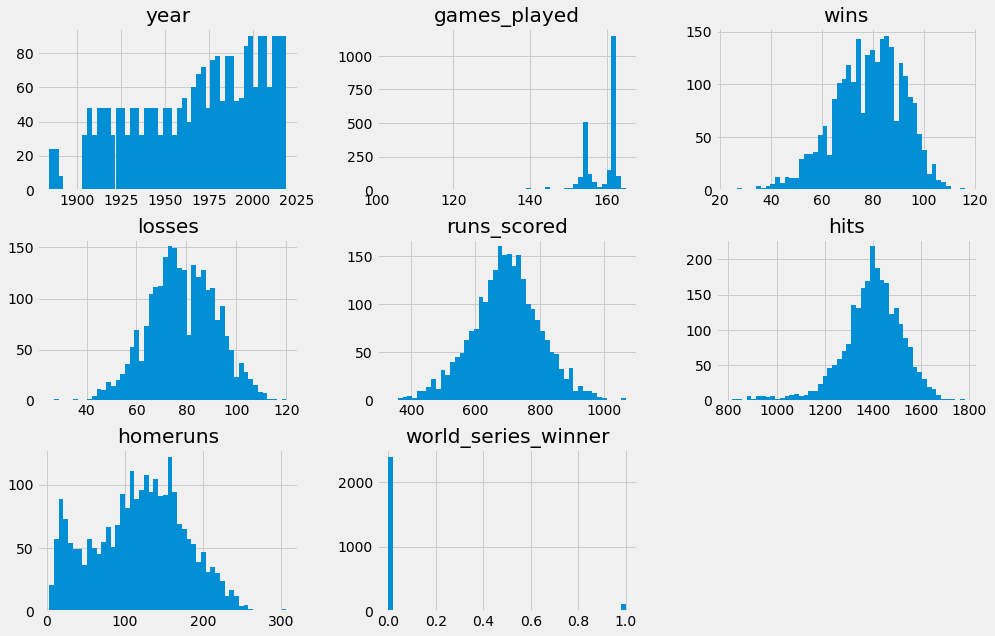

In [1524]:
df.hist(bins=50, figsize=(15,10))
plt.show()

And after looking at this distribution it looks like everything is correctly organized. So my data cleaning seems to have been successful.

Next I decided to take a look at different aspects of my data set. For example one thing that intrigued me was to look at the amount of homeruns per year over time. 

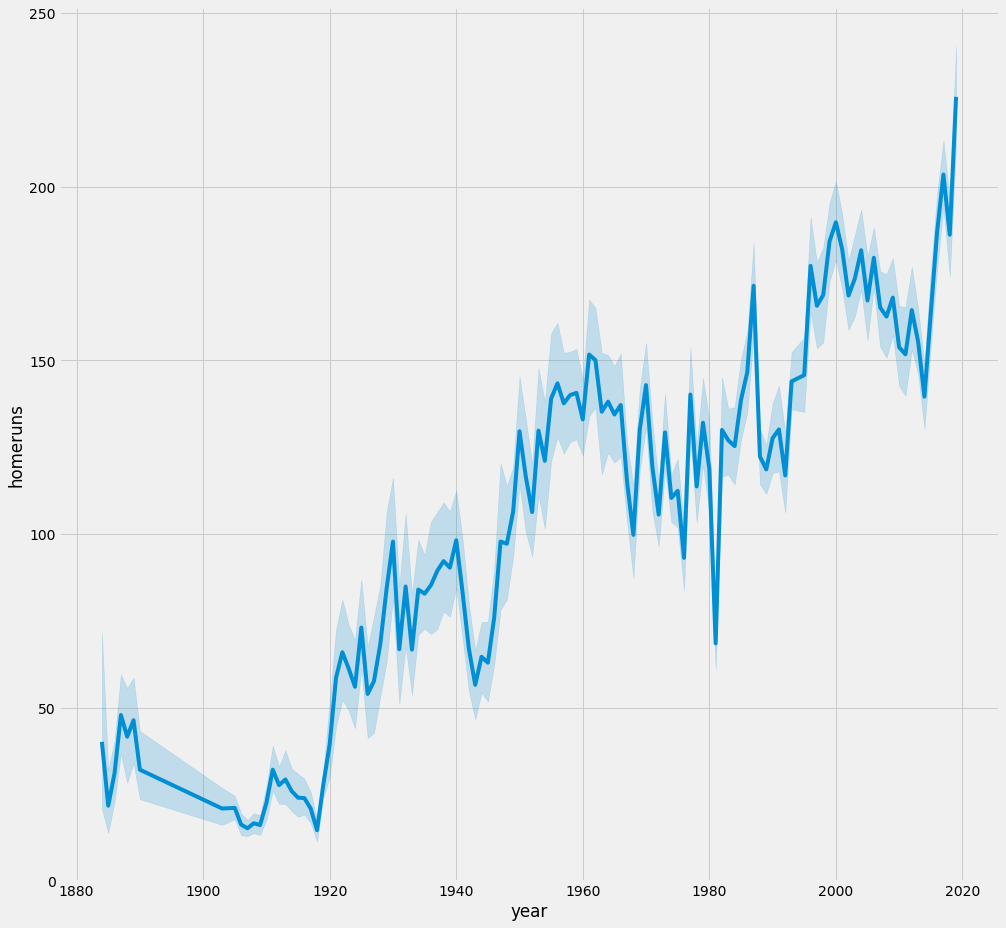

In [1525]:
sns.lineplot(data=df['homeruns'], x=df['year'], y=df['homeruns'])

You can see this shows an overall increase of homeruns per year as time goes on albeit with a few drops in between. However this correlates with what a lot of people tend to believe about baseball, which is that now we are hitting more home runs than ever before. 

Or for example hits throughout the years.

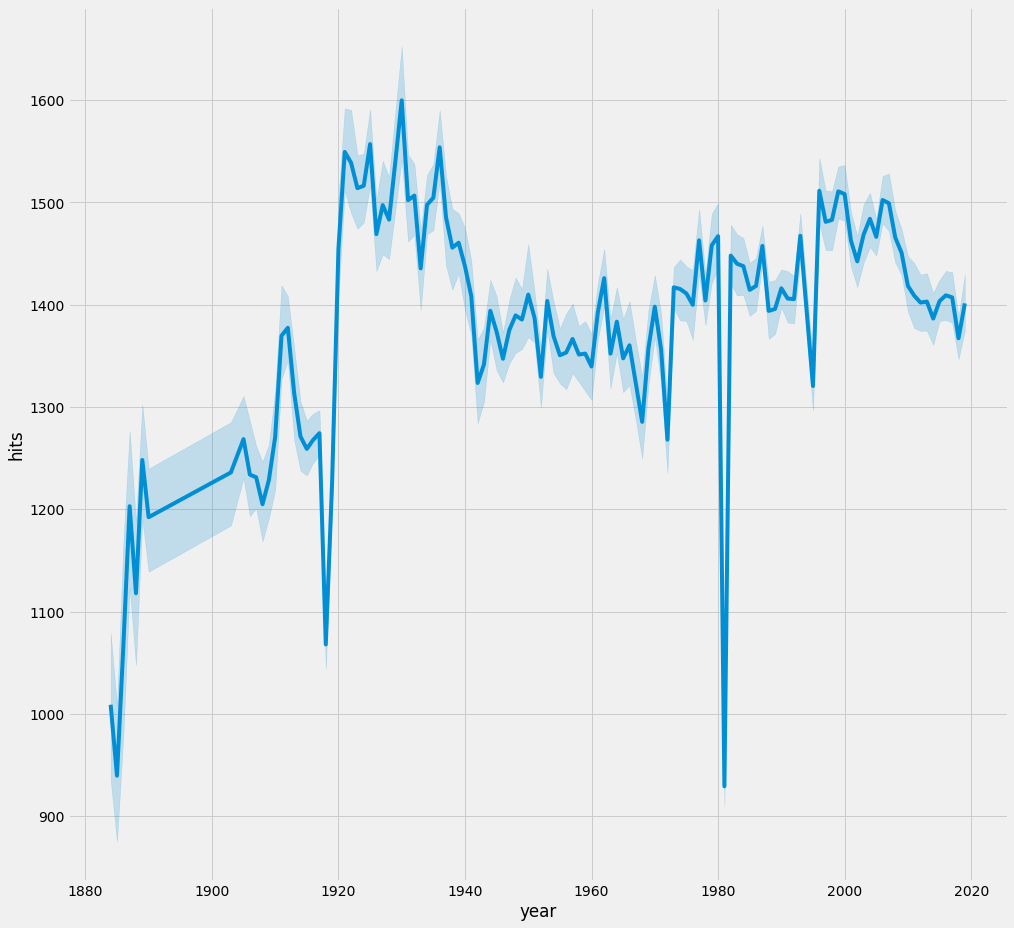

In [1526]:
sns.lineplot(data=df['hits'], x=df['year'], y=df['hits'])

The hits chart shows a slight increase over time in the amount of hits but mostly a steady number. However I did notice 2 drastic drops near the years of 1981 and 1918 and was intrigued by this. So I decided to check it to make sure it wasn't an error, and turns out it wasn't. In 1918 the MLB actually had a shortened season due to the ongoing World War 1 at the time. Likewise in 1981 the MLB players had went on strike and thus all statistics across the board for these 2 season were overall down.

This brought up an issue of if should I drop the these outlier years or not. Since these year in history are an anomaly and ended up skewing the data drastically, I decided it would be best if I dropped these data entries from the 1918 and 1981 seasons.

In [1527]:
df = df[df.year != 1918]
df = df[df.year != 1981]

And you can see here that getting rid of those rows ended up removing the outliers to make the data frame more smoother

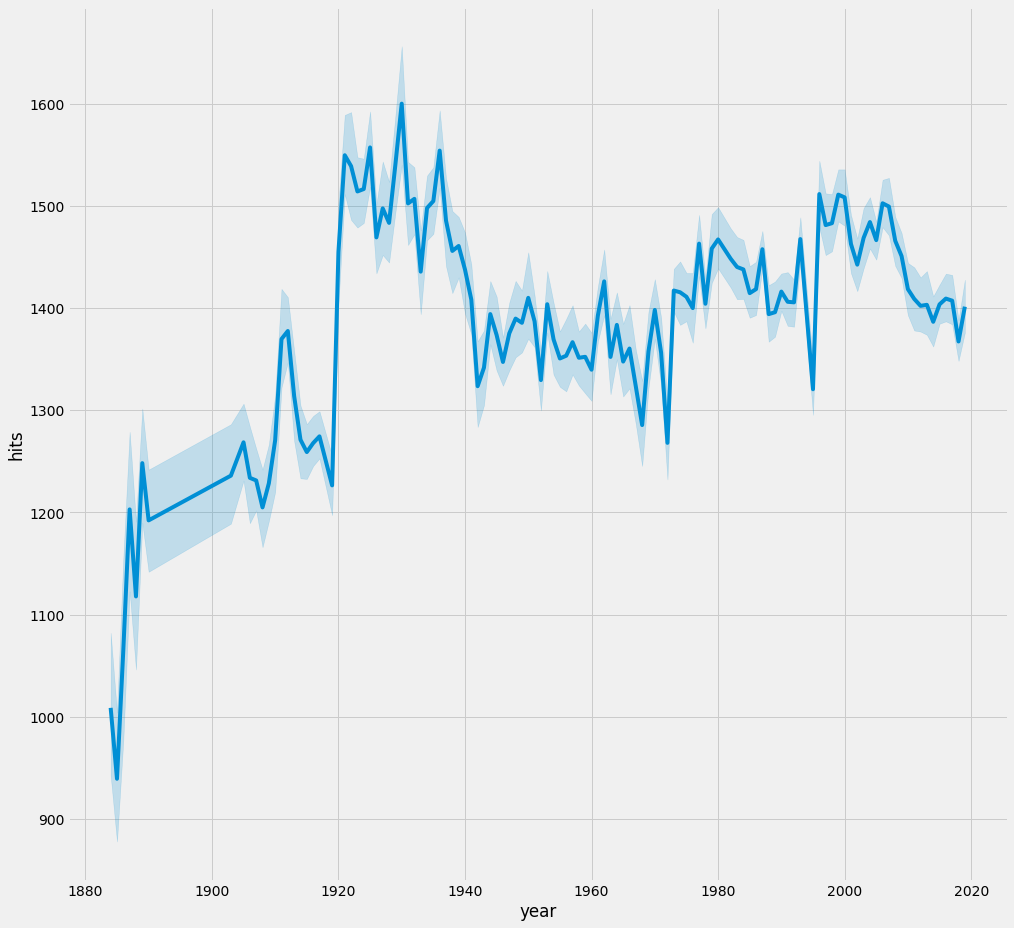

In [1528]:
sns.lineplot(data=df['hits'], x=df['year'], y=df['hits'])

Once that was fixed I decided to create a correlation matrix heatmap to see what kind of influence certain attributes have on each other. This helped immensely as my main goal was to see how the amount of home runs can relate to the number of wins. The heatmap would show me exactly that and also the correlation with other attributes as well.

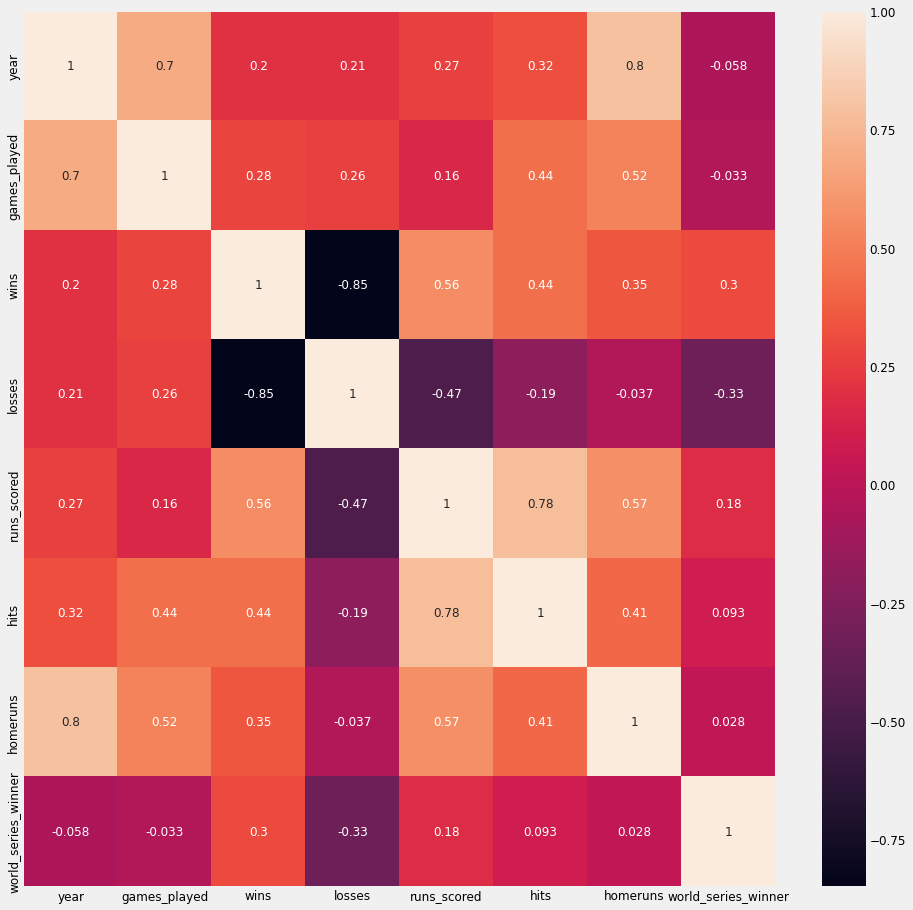

In [1529]:
corrMatrix = df.corr()
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

So as you can see according to the heatmap the most influential attributes on wins seems to be 'runs scored' followed by 'hits' then by 'home runs'. Showing that their are much bigger factors that affect wins than homeruns. 

## Reshaping The Data
Now that I finished analyzing the data I figured it best if I continue to further my understanding of the data by re-grouping and reshaping it.

So first off I decided to group the data and get the mean to see what values it might yield. I started by grouping by the 'year' variable so that I could see the mean average for each attribute per year.

In [1530]:
df.groupby('year').mean()

,games_played,wins,losses,runs_scored,hits,homeruns,world_series_winner
year,,,,,,,
1884,114.000000,55.875000,55.875000,628.500000,1008.875000,40.125000,0.125000
1885,111.250000,55.250000,55.250000,550.875000,939.500000,21.750000,0.000000
1886,123.000000,60.000000,60.000000,648.125000,1065.500000,31.125000,0.000000
1887,127.000000,61.500000,61.500000,772.875000,1203.000000,47.875000,0.125000
1888,135.500000,66.500000,66.500000,617.125000,1117.875000,41.625000,0.125000
...,...,...,...,...,...,...,...
2015,161.933333,80.966667,80.966667,688.233333,1403.533333,163.633333,0.033333
2016,161.866667,80.900000,80.900000,724.800000,1409.200000,187.000000,0.033333
2017,162.000000,81.000000,81.000000,752.733333,1407.166667,203.500000,0.033333


And looking at the values generated I can see that they seem pretty on par with what is expected. 

Next I wanted to see the average stats per team overall

In [1531]:
temp = df
temp = temp.drop('year', 1)
temp.groupby('team_name').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,games_played,wins,losses,runs_scored,hits,homeruns,world_series_winner
team_name,,,,,,,
Anaheim Angels,162.000000,83.000000,79.000000,788.125000,1520.625000,165.500000,0.125000
Arizona Diamondbacks,162.000000,80.136364,81.863636,737.409091,1423.727273,172.409091,0.045455
Atlanta Braves,161.365385,82.980769,78.250000,704.826923,1411.730769,154.711538,0.019231
Baltimore Orioles,160.546875,81.000000,79.359375,703.359375,1402.546875,160.171875,0.046875
Boston Americans,151.000000,69.250000,79.000000,554.000000,1240.500000,27.000000,0.250000
...,...,...,...,...,...,...,...
Tampa Bay Rays,162.083333,86.750000,75.333333,715.833333,1376.416667,178.833333,0.000000
Texas Rangers,161.434783,79.369565,81.956522,760.282609,1466.391304,168.500000,0.000000
Toronto Blue Jays,161.536585,80.268293,81.195122,748.878049,1446.073171,174.292683,0.048780


## Models
So now we should run the various models to see what further information we can gather from the data

I started with a K-Best model as this model allows you to choose a target, in my case being 'wins', and see which other variables have the most influence on the target.

In [1532]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

temp = df.copy()
temp.drop(['team_name'], axis = 1, inplace = True)


target = temp['wins']
features = temp.drop('wins', axis = 1).copy()
feature_names = list(features.columns)


selection_kBest = SelectKBest(f_regression, k = 5).fit(features, target)

features_kbest = selection_kBest.get_support()
print('Overall Features ', df.columns, '\n')
print('Chosen features', features.columns[features_kbest], '\n')
selection_kBest.scores_
scores = pd.DataFrame({'Feature Name' : features.columns, 'Score' : selection_kBest.scores_}).sort_values(by='Score', ascending=False)
print(scores)

Overall Features  Index(['year', 'team_name', 'games_played', 'wins', 'losses', 'runs_scored',
       'hits', 'homeruns', 'world_series_winner'],
      dtype='object') 

Chosen features Index(['losses', 'runs_scored', 'hits', 'homeruns', 'world_series_winner'], dtype='object') 

          Feature Name        Score
2               losses  6353.074133
3          runs_scored  1150.292208
4                 hits   585.023965
5             homeruns   335.874968
6  world_series_winner   249.167941
1         games_played   214.502942
0                 year   107.509454


And after running the model you can see that obviously 'losses' is scored first since losses directly offset wins. However right up next it shows 'runs_scored' and 'hits' both having a higher impact on wins than homeruns. This shows again that homeruns are not truly that influential on the overall win numbers during a season.

For my next model I decided to do a RFE model to show how each attribute would be ranked in respect to the target, that being 'wins'. 

In [1540]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5, step = 1)
rfe.fit(features, target)
rfe_features = features.columns[rfe.support_]
rfe_output = pd.DataFrame({'Features' : features.columns, 'Rank' : rfe.ranking_}).sort_values(by='Rank')
print(rfe_output)

              Features  Rank
2               losses     1
3          runs_scored     1
4                 hits     1
5             homeruns     2
6  world_series_winner     2
0                 year     3
1         games_played     3


And again as you can see the RFE model ended up giving nearly identical results as the K-Best Model and the Correlation Matrix further showing concistency in the results

### Ridge Regression Model

Another model I tried was the Ridge Regression Model from (https://machinelearningmastery.com/ridge-regression-with-python/). The Ridge Regression Model can be configured in many different ways, in this implementation it is used to calculate the Mean Absolute Error (MAE) and the Standard Deviation

In [1534]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
X = features
y = target

# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.612 (0.042)


### Multiple Linear Regression Model
For the next model I decided to do a multiple linear regression model. It's an extension of regular linear regression however it allows you to compare more than 2 attributes at a time. Since I already had my features and target training set, I simply set those equal to X and y and let the model run. 

In [1535]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  

# defining feature matrix(X) and response vector(y)
X = features
y = target
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Coefficients:  [ 0.01862519  0.96127249 -0.99779136 -0.00305621  0.00347662  0.00350542
 -0.21370796]
Variance score: 0.9951595225437276


The coefficients and variance scores were calculated then displayed. The variance score was 99 which shows that this is a very accurate model for this data set.

Next the residual error was plotted to show how most of the training data was very accurate in it's predictions next to the real data.

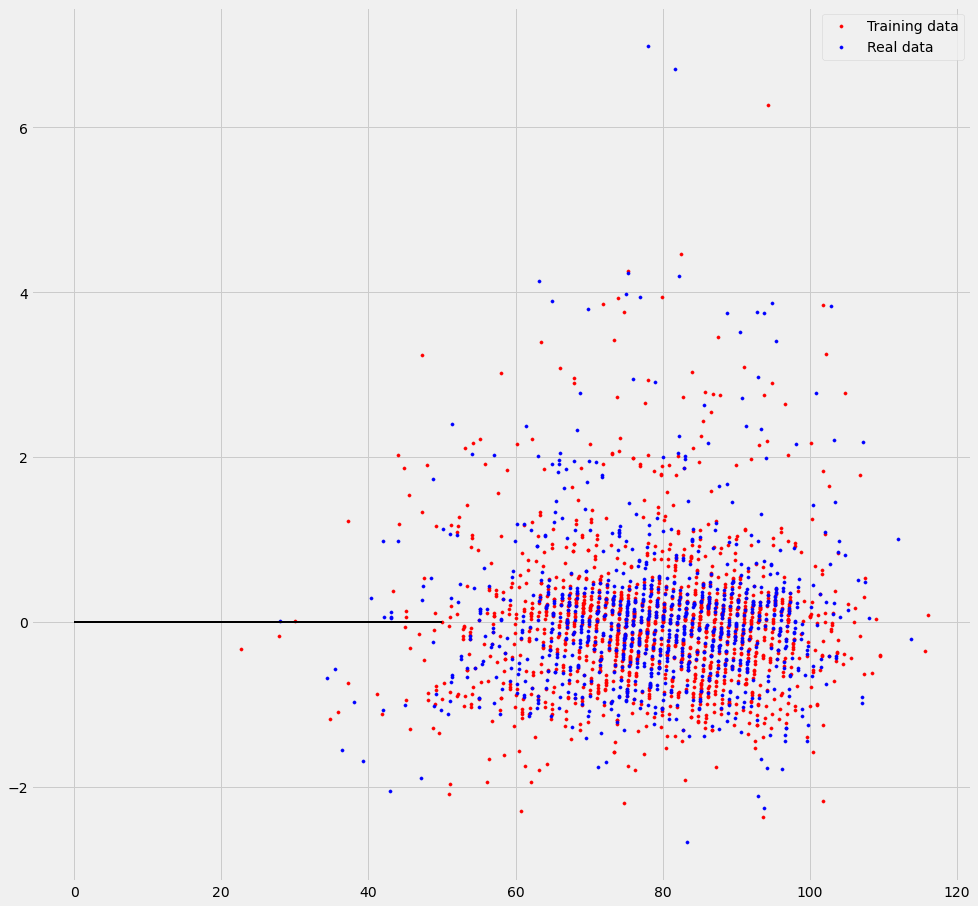

In [1536]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Training data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Real data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')

## method call for showing the plot
plt.show()

For the Ensemble Model I ended up using an example from the website (https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) This model creates 3 sub-models being the KNN Model, Decision Tree Model and an SVM Model. It then stacks the models and generates the MAE (Mean Absolute Error) and the standard deviation.

In [1537]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -101.019 (7.161)
>cart -147.197 (10.309)
>svm -162.419 (12.565)


Running the model you can see that out of all 3 the SVM model ends up winning with the lowest MAE number.

## Conclusion
In conclusion by utilizing the many tools of data analytics I was able to fully explore this data set and answer all the questions I had when I first began my study. Throughout the project I was able to see many trends and recurring data which only further helped cement the conclusions that were being drawn. I wanted to look into the relationship between homeruns and wins and was able to do so successfully. And this was accomplished mostly by applying the various models and techniques we've learned all throughout the semester. 

## Sources
https://www.openintro.org/data/index.php?data=mlb_teams
https://datatofish.com/count-nan-pandas-dataframe/
https://www.w3resource.com/python-exercises/pandas/movies/python-pandas-movies-exercise-8.php
https://www.interviewqs.com/ddi-code-snippets/rows-cols-python
https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
https://www.tutorialspoint.com/how-to-check-the-data-type-in-pandas-dataframe#:~:text=To%20check%20the%20data%20type%20in%20pandas%20DataFrame%20we%20can,values%20of%20the%20series%20object.
https://sparkbyexamples.com/pandas/pandas-check-column-contains-a-value-in-dataframe/
https://machinelearningmastery.com/ridge-regression-with-python/
https://www.geeksforgeeks.org/linear-regression-python-implementation/
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
https://stackoverflow.com/questions/55786121/what-is-the-negative-mean-absolute-error-in-scikit-learn